In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/금융빅데이터분석가/기업 부실 예측/data

/content/drive/MyDrive/금융빅데이터분석가/기업 부실 예측/data


In [ ]:
# 실행 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from tensorflow import keras
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 부도확률 등급 나누기용

data_x = pd.read_csv('변수선정완료.csv', index_col = 0)
data_x

,ocf 대 유동부채,비유동장기적합률,자기자본순이익률,자기자본회전률,차입금의존도,총자본영업이익률,총자산순이익률,총자산영업이익률,총자산회전율,부도여부
1,0.889954,37.87,5.09,0.94,4.93,7.26,0.000000,0.071591,0.761634,0.0
2,0.718559,44.83,12.64,1.03,2.80,16.04,0.097519,0.152184,0.837150,0.0
3,0.387372,79.64,14.83,0.98,10.70,15.03,0.091560,0.128307,0.709190,0.0
4,0.224878,83.76,2.54,1.01,13.12,3.18,0.016750,0.031842,0.677531,0.0
5,0.526337,82.33,7.97,1.06,2.95,7.72,0.052085,0.075484,0.707107,0.0
...,...,...,...,...,...,...,...,...,...,...
19990,0.283758,36.67,16.34,0.91,0.42,20.07,0.134657,0.200670,1.550443,0.0
19991,-0.141100,38.37,6.45,0.60,3.29,6.45,0.053899,0.060574,0.512557,0.0
19992,2.987545,52.85,3.70,0.59,0.50,2.91,0.034638,0.029482,0.522779,0.0
19993,2.709969,53.41,2.08,0.48,23.08,1.97,0.014061,0.016591,0.367630,0.0


In [ ]:
input_data = data_x[data_x.columns.difference(['부도여부'])]
target_data = data_x.부도여부

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, test_size = 0.2, random_state = 42)

In [ ]:
sm = SMOTE(random_state = 42, sampling_strategy=0.1)
train_input_res, train_target_res = sm.fit_resample(train_input, train_target.ravel())

In [ ]:
# 로짓기반 예상확률
lr_model  = LogisticRegression(random_state = 42)
lr_model.fit(train_input_res, train_target_res)

proba_fail_train = lr_model.predict_proba(train_input_res)[:,1]
proba_fail_test = lr_model.predict_proba(test_input)[:,1]

proba_fail = np.concatenate((proba_fail_train, proba_fail_test))
print(len(proba_fail_train))
print(len(proba_fail_test))
print(len(proba_fail))


15323
3519
18842


In [ ]:
proba_fail = proba_fail.tolist()

In [ ]:
test_target

,부도여부
18874,0.0
12787,0.0
15585,0.0
5577,0.0
2219,0.0
...,...
15441,0.0
9909,0.0
1429,0.0
3300,0.0


In [ ]:
train_target_res = train_target_res.tolist()
train_target_res_data = pd.DataFrame(dict(rows = train_target_res))
train_target_res_data

,rows
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
15318,1.0
15319,1.0
15320,1.0
15321,1.0


In [ ]:
train_target_res_data = train_target_res_data.rename(columns = {'rows' : '부도여부'})

In [ ]:
test_target = pd.DataFrame(test_target)

In [ ]:
test_target

,부도여부
18874,0.0
12787,0.0
15585,0.0
5577,0.0
2219,0.0
...,...
15441,0.0
9909,0.0
1429,0.0
3300,0.0


In [ ]:
target = pd.concat([train_target_res_data, test_target])
target

,부도여부
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
15441,0.0
9909,0.0
1429,0.0
3300,0.0


In [ ]:
target.reset_index(drop = True, inplace = True)

In [ ]:
target

,부도여부
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
18837,0.0
18838,0.0
18839,0.0
18840,0.0


In [ ]:
data_1 = pd.DataFrame(dict(rows = proba_fail))

In [ ]:
bankruptcy_prob = pd.concat([data_1, target], axis = 1)

In [ ]:
bankruptcy_prob.rename(columns ={ 'rows': '예상부도율'}, inplace = True)
bankruptcy_prob

,예상부도율,부도여부
0,0.058674,0.0
1,0.007948,0.0
2,0.032925,0.0
3,0.008037,0.0
4,0.745124,0.0
...,...,...
18837,0.052974,0.0
18838,0.025008,0.0
18839,0.021797,0.0
18840,0.021737,0.0


In [ ]:
# pd.set_option('display.max_rows', None)

(0.0, 1000.0)

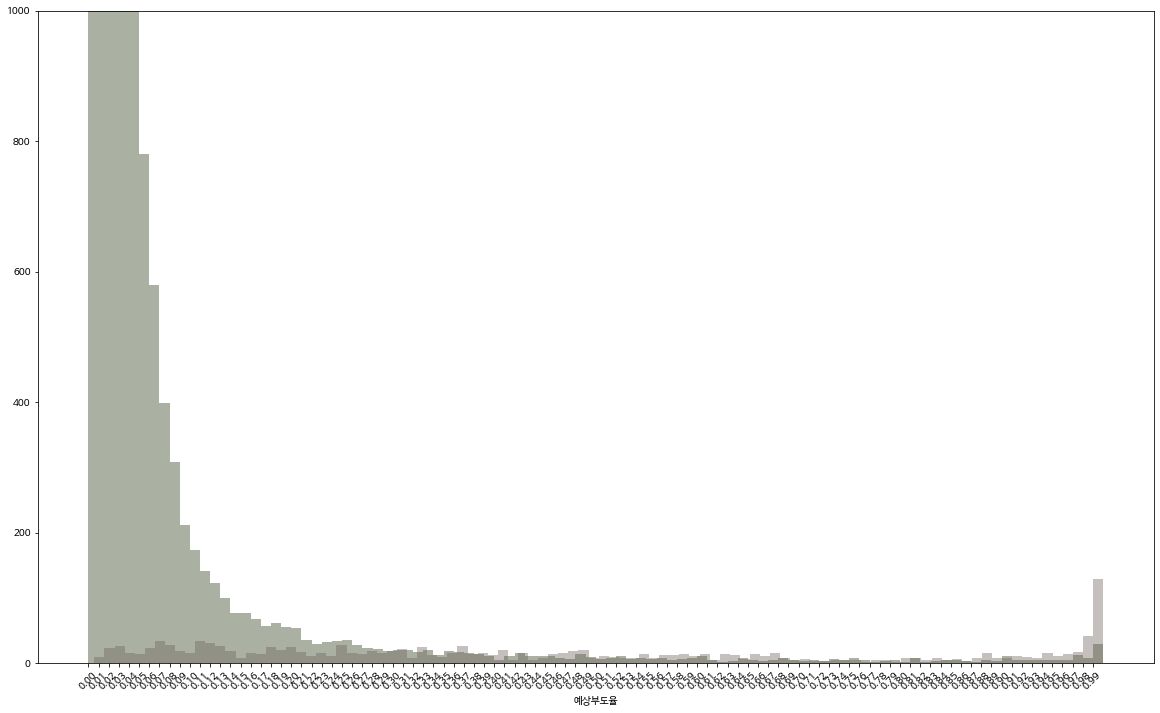

In [ ]:
plt.figure(figsize=(20,12))
import seaborn as sns
budo_0 = bankruptcy_prob.query("부도여부 == '0'")["예상부도율"]
budo_1 = bankruptcy_prob.query("부도여부 == '1'")["예상부도율"]
sns.distplot(budo_0, bins = 100,  color = '#2B3C17', kde = False)
sns.distplot(budo_1, bins = 100,  color = '#6F635B', kde =False)
plt.xticks(np.arange(0,1, 0.01))
plt.xticks(rotation=45)
plt.ylim(0,1000)

- 예상부도율이 0.98이상부터 정상 기업과 부도 기업간의 빈도 차이가 크게 나므로 9등급의 cutoff를 0.98로 정함

In [ ]:
bankruptcy_prob[bankruptcy_prob['예상부도율'] >= 0.98].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 153 to 18445
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   예상부도율   208 non-null    float64
 1   부도여부    208 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


In [ ]:
# 등급나누기기

# 부도여부 1중에 확률 0.98 이상인거 빼기
idx=bankruptcy_prob[bankruptcy_prob['예상부도율']>=0.98].index

In [ ]:
bankruptcy_prob_not = bankruptcy_prob.drop(index = idx)

In [ ]:
bankruptcy_prob_not.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18634 entries, 0 to 18841
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   예상부도율   18634 non-null  float64
 1   부도여부    18634 non-null  float64
dtypes: float64(2)
memory usage: 436.7 KB


In [ ]:
bankruptcy_prob_not.sort_values(by = '예상부도율', ascending = False, inplace = True)
bankruptcy_prob_not

,예상부도율,부도여부
14296,9.799397e-01,1.0
14448,9.794065e-01,1.0
14602,9.791786e-01,1.0
12197,9.790307e-01,0.0
14377,9.788952e-01,1.0
...,...,...
7545,1.770455e-05,0.0
7446,8.024650e-06,0.0
3649,6.312071e-06,0.0
17952,1.204798e-06,0.0


In [ ]:
for i in range(8):
  globals()[f"bank_level_{i}"] =bankruptcy_prob_not[2329*(i):2329*(i+1)] # 18634 8등분
  print(globals()[f"bank_level_{i}"].예상부도율.min(), globals()[f"bank_level_{i}"].예상부도율.max())

0.1277802183155392 0.9799397358219751
0.05641120745813893 0.12777634034132562
0.03759613049342815 0.05641069196987179
0.027617511480194534 0.037594216022163014
0.020255188120368726 0.027611721145895066
0.0142367329647778 0.020253301312038872
0.008279135456054963 0.014231990904534064
6.312070973472673e-06 0.008278319620930214


In [ ]:
print("9등급\n",bankruptcy_prob[bankruptcy_prob['예상부도율'] >=0.98].부도여부.value_counts())
for i in range(8):
  print(8-i,"등급")
  print(globals()[f"bank_level_{i}"]['부도여부'].value_counts())

9등급
 1.0    171
0.0     37
Name: 부도여부, dtype: int64
8 등급
0.0    1333
1.0     996
Name: 부도여부, dtype: int64
7 등급
0.0    2145
1.0     184
Name: 부도여부, dtype: int64
6 등급
0.0    2298
1.0      31
Name: 부도여부, dtype: int64
5 등급
0.0    2310
1.0      19
Name: 부도여부, dtype: int64
4 등급
0.0    2304
1.0      25
Name: 부도여부, dtype: int64
3 등급
0.0    2320
1.0       9
Name: 부도여부, dtype: int64
2 등급
0.0    2326
1.0       3
Name: 부도여부, dtype: int64
1 등급
0.0    2326
1.0       3
Name: 부도여부, dtype: int64


- 나머지 2개 1등급에 추가